# Bibliotecas e base de dados

In [1]:
import numpy as np 
import os
import pandas as pd 
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from keras.layers import Softmax
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import LeakyReLU

import plotly.offline as py
import plotly.graph_objs as go

# Montagem drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Base de dados

In [3]:
reader_sentiment = pd.read_csv("/content/drive/MyDrive/TCC_MBA_PUC/tweet_sentiment")

In [4]:
reader_sentiment.head(-2)

,date,text_length,vader_neg(%),vader_neu(%),vader_pos(%),vader_comp(%)
0,2021-02-05,125.817001,3.581110,88.148347,8.270366,8.976145
1,2021-02-06,123.070470,2.658420,89.269341,8.072605,10.144201
2,2021-02-07,127.871947,2.396898,90.047492,7.555908,9.768178
3,2021-02-08,121.255534,2.497857,88.053887,9.448238,12.551693
4,2021-02-09,124.592184,3.006460,87.826023,9.166575,11.600320
...,...,...,...,...,...,...
94,2021-11-24,180.492088,3.883237,83.701050,12.413567,20.944067
95,2021-11-25,196.828637,3.166394,81.556232,15.275825,29.569041
96,2021-11-26,182.715087,4.377209,82.898840,12.722798,20.951792
97,2021-12-11,184.366755,3.841689,85.095336,11.062425,18.272367


In [5]:
reader_sentiment.shape

(101, 6)

## Capturando dados financeiros

https://finance.yahoo.com/

In [6]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 9.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [7]:
import yfinance as yf
#início mesma data do tweet_sentiment
reader_btc = yf.download('BTC-USD', start = '2021-02-05', end = '2021-12-17')

[*********************100%***********************]  1 of 1 completed


In [8]:
print(reader_btc.info())
reader_btc.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 316 entries, 2021-02-05 to 2021-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       316 non-null    float64
 1   High       316 non-null    float64
 2   Low        316 non-null    float64
 3   Close      316 non-null    float64
 4   Adj Close  316 non-null    float64
 5   Volume     316 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 17.3 KB
None


,Open,High,Low,Close,Adj Close,Volume
count,316.000000,316.000000,316.000000,316.000000,316.000000,3.160000e+02
mean,48762.060195,50111.408815,47206.342891,48779.802401,48779.802401,4.565224e+10
std,9535.333058,9577.950867,9469.006621,9504.277304,9504.277304,2.454505e+10
min,29796.285156,31006.187500,28893.621094,29807.347656,29807.347656,1.878799e+10
25%,40554.503906,42406.125000,39229.653320,40760.472656,40760.472656,3.237769e+10
50%,48914.964844,49947.011719,47182.458984,48919.843750,48919.843750,3.907462e+10
75%,57236.004883,58354.164062,55378.113281,57234.485352,57234.485352,5.461158e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [9]:
reader_btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886


# Preço e sentimento no mesmo DF

In [10]:
import datetime as dt

In [11]:
reader_btc.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653


In [12]:
reader_sentiment.head(2)

,date,text_length,vader_neg(%),vader_neu(%),vader_pos(%),vader_comp(%)
0,2021-02-05,125.817001,3.58111,88.148347,8.270366,8.976145
1,2021-02-06,123.070470,2.65842,89.269341,8.072605,10.144201


No DF reader_btc necessário excluir índice 'Date' e incluir coluna 'date' para realizar o merge entre os DF

In [13]:
# inclusao da coluna 'date'
reader_btc['date'] = reader_btc.index

#remoçao do índice 'Date'
reader_btc.reset_index(drop=True, inplace=True)

reader_btc.head(2)

,Open,High,Low,Close,Adj Close,Volume,date
0,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402,2021-02-05
1,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,2021-02-06


In [14]:
a = reader_sentiment['date'][0]
print(type(a))
a

<class 'str'>


'2021-02-05'

In [15]:
b = reader_btc['date'][0]
print(type(b))
b

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2021-02-05 00:00:00')

In [16]:
print(len(reader_sentiment['date']))
print(len(reader_btc['date']))

101
316


'date' em formatos diferentes e DFs com tamanhos diferentes => ajustando formato da data para merge dos DFs

In [17]:
day_btc = []
day_sentiment = []
for i in range(len(reader_btc['date'])):
  a = reader_btc['date'][i]
  a = dt.datetime.strftime(a, '%Y-%m-%d')
  a = dt.datetime.strptime(a, '%Y-%m-%d')
  day_btc.append(a)

for i in range(len(reader_sentiment['date'])):  
  b = reader_sentiment['date'][i]
  b = dt.datetime.strptime(b, '%Y-%m-%d')
  day_sentiment.append(b)

print(day_btc)
print(day_sentiment)  

reader_btc['Date'] = day_btc
reader_sentiment['Date'] = day_sentiment  

[datetime.datetime(2021, 2, 5, 0, 0), datetime.datetime(2021, 2, 6, 0, 0), datetime.datetime(2021, 2, 7, 0, 0), datetime.datetime(2021, 2, 8, 0, 0), datetime.datetime(2021, 2, 9, 0, 0), datetime.datetime(2021, 2, 10, 0, 0), datetime.datetime(2021, 2, 11, 0, 0), datetime.datetime(2021, 2, 12, 0, 0), datetime.datetime(2021, 2, 13, 0, 0), datetime.datetime(2021, 2, 14, 0, 0), datetime.datetime(2021, 2, 15, 0, 0), datetime.datetime(2021, 2, 16, 0, 0), datetime.datetime(2021, 2, 17, 0, 0), datetime.datetime(2021, 2, 18, 0, 0), datetime.datetime(2021, 2, 19, 0, 0), datetime.datetime(2021, 2, 20, 0, 0), datetime.datetime(2021, 2, 21, 0, 0), datetime.datetime(2021, 2, 22, 0, 0), datetime.datetime(2021, 2, 23, 0, 0), datetime.datetime(2021, 2, 24, 0, 0), datetime.datetime(2021, 2, 25, 0, 0), datetime.datetime(2021, 2, 26, 0, 0), datetime.datetime(2021, 2, 27, 0, 0), datetime.datetime(2021, 2, 28, 0, 0), datetime.datetime(2021, 3, 1, 0, 0), datetime.datetime(2021, 3, 2, 0, 0), datetime.datetime(

In [18]:
reader_btc.head(2)

,Open,High,Low,Close,Adj Close,Volume,date,Date
0,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402,2021-02-05,2021-02-05
1,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,2021-02-06,2021-02-06


In [19]:
reader_sentiment.head(2)

,date,text_length,vader_neg(%),vader_neu(%),vader_pos(%),vader_comp(%),Date
0,2021-02-05,125.817001,3.58111,88.148347,8.270366,8.976145,2021-02-05
1,2021-02-06,123.070470,2.65842,89.269341,8.072605,10.144201,2021-02-06


In [20]:
df_merged = pd.merge(reader_btc, reader_sentiment, how='outer', on='Date')

In [21]:
print(df_merged.isnull().sum())
df_merged.head(-2)

Open               2
High               2
Low                2
Close              2
Adj Close          2
Volume             2
date_x             2
Date               0
date_y           217
text_length      217
vader_neg(%)     217
vader_neu(%)     217
vader_pos(%)     217
vader_comp(%)    217
dtype: int64


,Open,High,Low,Close,Adj Close,Volume,date_x,Date,date_y,text_length,vader_neg(%),vader_neu(%),vader_pos(%),vader_comp(%)
0,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,5.859807e+10,2021-02-05,2021-02-05,2021-02-05,125.817001,3.581110,88.148347,8.270366,8.976145
1,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,7.132603e+10,2021-02-06,2021-02-06,2021-02-06,123.070470,2.658420,89.269341,8.072605,10.144201
2,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,6.550064e+10,2021-02-07,2021-02-07,2021-02-07,127.871947,2.396898,90.047492,7.555908,9.768178
3,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,1.014672e+11,2021-02-08,2021-02-08,2021-02-08,121.255534,2.497857,88.053887,9.448238,12.551693
4,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,9.180985e+10,2021-02-09,2021-02-09,2021-02-09,124.592184,3.006460,87.826023,9.166575,11.600320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,50114.742188,50205.000000,45894.847656,46737.480469,46737.480469,3.216673e+10,2021-12-13,2021-12-13,NaN,NaN,NaN,NaN,NaN,NaN
312,46709.824219,48431.398438,46424.496094,46612.632812,46612.632812,3.463862e+10,2021-12-14,2021-12-14,NaN,NaN,NaN,NaN,NaN,NaN
313,48379.753906,49473.957031,46671.964844,48896.722656,48896.722656,3.654183e+10,2021-12-15,2021-12-15,NaN,NaN,NaN,NaN,NaN,NaN
314,48900.464844,49425.574219,47529.878906,47665.425781,47665.425781,2.726815e+10,2021-12-16,2021-12-16,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df = df_merged[['Date', 'Close', 'vader_comp(%)' ]]
print(df.isnull().sum())
df.head(-2)

Date               0
Close              2
vader_comp(%)    217
dtype: int64


,Date,Close,vader_comp(%)
0,2021-02-05,38144.308594,8.976145
1,2021-02-06,39266.011719,10.144201
2,2021-02-07,38903.441406,9.768178
3,2021-02-08,46196.464844,12.551693
4,2021-02-09,46481.105469,11.600320
...,...,...,...
311,2021-12-13,46737.480469,NaN
312,2021-12-14,46612.632812,NaN
313,2021-12-15,48896.722656,NaN
314,2021-12-16,47665.425781,NaN


In [23]:
#identificaçao valores nulos para Bitcoin
df_btc_null = df.loc[df['Close'].isnull()]
df_btc_null

# estes valores serão mantidos nulos

,Date,Close,vader_comp(%)
316,2021-12-29,NaN,15.047462
317,2021-12-30,NaN,16.268185


In [24]:
#identificaçao valores nulos para Vader
df_sentiment_null = df.loc[df['vader_comp(%)'].isnull()]
df_sentiment_null

,Date,Close,vader_comp(%)
6,2021-02-11,47909.332031,NaN
7,2021-02-12,47504.851562,NaN
11,2021-02-16,49199.871094,NaN
12,2021-02-17,52149.007812,NaN
15,2021-02-20,56099.519531,NaN
...,...,...,...
310,2021-12-12,50098.335938,NaN
311,2021-12-13,46737.480469,NaN
312,2021-12-14,46612.632812,NaN
313,2021-12-15,48896.722656,NaN


In [25]:
# estes valores nulos do VADER serão substituídos pela média

# identificaçao da média
print(df.describe())
print('\n', '=#=#=#=#=#', '\n')

#substituiçao dos valores nulos pela média, somente para Vader
df['vader_comp(%)'].fillna(df['vader_comp(%)'].mean(), inplace=True)
print(df.isnull().sum())
print('\n', '=#=#=#=#=#', '\n')

#visualizar substituiçao
df.head(-2)

              Close  vader_comp(%)
count    316.000000     101.000000
mean   48779.802401      18.654065
std     9504.277304       6.483709
min    29807.347656       5.625346
25%    40760.472656      12.362389
50%    48919.843750      20.312993
75%    57234.485352      23.619683
max    67566.828125      36.608432

 =#=#=#=#=# 

Date             0
Close            2
vader_comp(%)    0
dtype: int64

 =#=#=#=#=# 



/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Close,vader_comp(%)
0,2021-02-05,38144.308594,8.976145
1,2021-02-06,39266.011719,10.144201
2,2021-02-07,38903.441406,9.768178
3,2021-02-08,46196.464844,12.551693
4,2021-02-09,46481.105469,11.600320
...,...,...,...
311,2021-12-13,46737.480469,18.654065
312,2021-12-14,46612.632812,18.654065
313,2021-12-15,48896.722656,18.654065
314,2021-12-16,47665.425781,18.654065


In [26]:
#create a file which sumarize the final DF
df.to_csv('treated_df')

# Leitura arquivo

In [27]:
#leitura csv com preço e sensibilidade
Real_Price = pd.read_csv('/content/drive/MyDrive/TCC_MBA_PUC/treated_df')

In [28]:
print(Real_Price.info())
Real_Price.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     318 non-null    int64  
 1   Date           318 non-null    object 
 2   Close          316 non-null    float64
 3   vader_comp(%)  318 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.1+ KB
None


,Unnamed: 0,Date,Close,vader_comp(%)
0,0,2021-02-05,38144.308594,8.976145
1,1,2021-02-06,39266.011719,10.144201
2,2,2021-02-07,38903.441406,9.768178
3,3,2021-02-08,46196.464844,12.551693
4,4,2021-02-09,46481.105469,11.600320


In [29]:
#eliminando 'Unnamed: 0'
Real_Price.drop(columns='Unnamed: 0', inplace=True)

#transformando coluna 'Date' em index 
Real_Price = Real_Price.set_index('Date')

# Check DF
Real_Price.head(2)

,Close,vader_comp(%)
Date,,
2021-02-05,38144.308594,8.976145
2021-02-06,39266.011719,10.144201


In [30]:
btc_trace = go.Scatter(x=Real_Price.index, y=Real_Price['Close'], name='Price')
py.iplot([btc_trace])

## Identificaçao valores nulos

In [31]:
Real_Price.isnull().sum()

Close            2
vader_comp(%)    0
dtype: int64

In [32]:
#identificaçao valores nulos na série (verificado no DF original, pois Real_Price é uma série)
df_null = Real_Price.loc[Real_Price['Close'].isnull()]
df_null

,Close,vader_comp(%)
Date,,
2021-12-29,NaN,15.047462
2021-12-30,NaN,16.268185


In [33]:
# check comprimento DF
print(f' Comprimento DB = {len(Real_Price)}, \n')

# Check últimas linhas
Real_Price.tail(5)

 Comprimento DB = 318, 



,Close,vader_comp(%)
Date,,
2021-12-15,48896.722656,18.654065
2021-12-16,47665.425781,18.654065
2021-12-17,46202.144531,16.599460
2021-12-29,NaN,15.047462
2021-12-30,NaN,16.268185


Como os valores nulos estão nas 2 últimas posições, estas serão removidas da base.

Com valores nulos o LSTM apresaentou erro, neste caso específico sem cálcular Vall_loss do Test (vall_loss = NaN)

In [34]:
# remoção valores nulos na série
Real_Price.dropna(inplace=True)

# check comprimento DF
print(f' Comprimento DB = {len(Real_Price)}, \n')

# visualizaçao da série sem os valores nulos
print(Real_Price.isnull().sum())
Real_Price

 Comprimento DB = 316, 

Close            0
vader_comp(%)    0
dtype: int64


,Close,vader_comp(%)
Date,,
2021-02-05,38144.308594,8.976145
2021-02-06,39266.011719,10.144201
2021-02-07,38903.441406,9.768178
2021-02-08,46196.464844,12.551693
2021-02-09,46481.105469,11.600320
...,...,...
2021-12-13,46737.480469,18.654065
2021-12-14,46612.632812,18.654065
2021-12-15,48896.722656,18.654065


# INPUT DATA

In [35]:
prediction_days = 5
#layer1 = 128
#layer2 = 128
#layer3 = 64
data_batch = 16
data_epoch = 200
#data_activation = 'LeakyReLU' 
data_activation = 'ReLU'
data_optimizer = 'adam'

# AVALIAÇAO TENDÊNCIA ATIVO
(LSTM)

In [36]:
# definição da semente para manutençao dos resultados
#semente inicial
seed=42
import random
np.random.seed(seed) 
random.seed(seed)
import tensorflow
tensorflow.random.set_seed(seed)
random_seed = seed

In [37]:
# chamada biblioteca
from sklearn.model_selection import train_test_split

close_values = Real_Price['Close']
close_values

Date
2021-02-05    38144.308594
2021-02-06    39266.011719
2021-02-07    38903.441406
2021-02-08    46196.464844
2021-02-09    46481.105469
                  ...     
2021-12-13    46737.480469
2021-12-14    46612.632812
2021-12-15    48896.722656
2021-12-16    47665.425781
2021-12-17    46202.144531
Name: Close, Length: 316, dtype: float64

Criar a estrutura de dados com janela 5 e output 1

In [38]:
# Organização das janelas e composição do vetor de entrada da rede
window = 5        # A janela real é sempre o valor do (window - 1), pois é exclusivo!
trainSize = len(close_values)
X = []
y = []
# organizando os dados seguenciais em listas com o comprimento do window 
for i in range(window, trainSize):
    X.append(list(close_values.iloc[i-window:i]))
    y.append(close_values.iloc[i])


In [39]:
# dados seguenciais em listas com o comprimento do window 
len(X), len(X[0])

(311, 5)

In [40]:
print(X)

[[38144.30859375, 39266.01171875, 38903.44140625, 46196.46484375, 46481.10546875], [39266.01171875, 38903.44140625, 46196.46484375, 46481.10546875, 44918.18359375], [38903.44140625, 46196.46484375, 46481.10546875, 44918.18359375, 47909.33203125], [46196.46484375, 46481.10546875, 44918.18359375, 47909.33203125, 47504.8515625], [46481.10546875, 44918.18359375, 47909.33203125, 47504.8515625, 47105.515625], [44918.18359375, 47909.33203125, 47504.8515625, 47105.515625, 48717.2890625], [47909.33203125, 47504.8515625, 47105.515625, 48717.2890625, 47945.05859375], [47504.8515625, 47105.515625, 48717.2890625, 47945.05859375, 49199.87109375], [47105.515625, 48717.2890625, 47945.05859375, 49199.87109375, 52149.0078125], [48717.2890625, 47945.05859375, 49199.87109375, 52149.0078125, 51679.796875], [47945.05859375, 49199.87109375, 52149.0078125, 51679.796875, 55888.1328125], [49199.87109375, 52149.0078125, 51679.796875, 55888.1328125, 56099.51953125], [52149.0078125, 51679.796875, 55888.1328125, 56

In [41]:
# divisão base em treino e test
df_train, df_test, trainY, testY = train_test_split(X, y, test_size = 0.2,random_state = random_seed)

In [42]:
# dados seguenciais ainda em formato de listas com o comprimento do window 
len(df_train), len(df_train[0])

(248, 5)

In [43]:
# transformando dados traino e teste em matrizes (devido restrição keras de trabalhar com np.array)
trainX = np.array(df_train)
testX = np.array(df_test)
trainY = np.array(trainY)
testY = np.array(testY)

# visualização
trainX.shape

(248, 5)

Normalização dos dados

In [44]:
# Normalização da base X, tanto no treino como no teste
scaler_X = MinMaxScaler(feature_range=(0, 1))
#scaler_X = StandardScaler()
scaled_X_train = scaler_X.fit_transform(trainX)

scaled_X_test = scaler_X.transform(testX)

In [45]:
# Normalização da base y, tanto no treino como no teste
scaler_y = MinMaxScaler(feature_range=(0, 1))
#scaler_y = StandardScaler()
scaled_y_train = scaler_y.fit_transform(trainY.reshape(-1, 1))

scaled_y_test = scaler_y.transform(testY.reshape(-1, 1))

Reshaping dos dados

In [46]:
# visualizar dados: # fazer reshape devido camada LSTM
#print(scaled_X_train)
#print(scaled_y_train)

trainX = np.reshape(scaled_X_train, (scaled_X_train.shape[0], 1, scaled_X_train.shape[1]))
testX = np.reshape(scaled_X_test, (scaled_X_test.shape[0], 1, scaled_X_test.shape[1]))

trainX.shape

(248, 1, 5)

In [47]:
trainY = scaled_y_train
testY = scaled_y_test

Construção da RNN

In [48]:
'''
  
  ESTUDADO MELHORIA NOS RESULTADOS:
  
  1 - usar camada Bidirecional entre as camadas LSTM

  2 - usar camada BatchNormalization entre camadas LSTM

  3 - adicionar camada Flatten após última camada LSTM e depois adicionar camada Dense

  '''

from keras.layers.core.activation import Activation

from keras.backend import dropout

# Initicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout
#regressor.add(Bidirectional(LSTM(units = 16, activation = data_activation, return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))) #inclusao camada bidirecional
regressor.add(LSTM(units = 16, activation = data_activation, return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
#regressor.add(BatchNormalization()) # entre as camadas LSTM
#regressor.add(Dropout(0.2))

# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 5, activation = data_activation))
#regressor.add(Bidirectional(LSTM(units = 5, activation = data_activation)))
#regressor.add(BatchNormalization()) # entre as camadas LSTM
#regressor.add(LSTM(units = 64, activation = data_activation, return_sequences=True, dropout=0.2, input_shape = (trainX.shape[1], trainX.shape[2])))
#regressor.add(LSTM(units = 32, activation = data_activation))
#regressor.add(Dropout(0.2))
#regressor.add(Flatten())

# Adicionar a terceira camada LSTM e Dropout
#regressor.add(LSTM(units = 256, activation = 'ReLU',return_sequences=True, dropout=0.2, input_shape = (trainX.shape[1], trainX.shape[2])))
#regressor.add(LSTM(units = 256, activation = 'LeakyReLU',return_sequences=True, dropout=0.2, input_shape = (trainX.shape[1], trainX.shape[2])))
# regressor.add(LSTM(units = layer3))
#regressor.add(dropout(0.2))

# camada de saída
regressor.add(Dense(units = 1))

# Compilar a rede
regressor.compile(optimizer = data_optimizer, loss = 'mean_squared_error')


Treinamento da rede

In [49]:
# Treinamento da rede LSTM

# Definição melhores pesos
#from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
#es = EarlyStopping(patience=100, )
#rlr = ReduceLROnPlateau(monitor='val_loss', patience=100)
#mc = ModelCheckpoint(filepath='best.h5', save_best_only=True) # se quiser manter um tracking da época e do erro: 'best_{epoch:03d}-{val_loss:.4f}.h5'

#history = regressor.fit(trainX, trainY, batch_size = data_batch, epochs = data_epoch, verbose=1, shuffle=False, validation_data=(testX, testY), validation_split=0.0001, callbacks=[mc])
#history = regressor.fit(trainX, trainY, batch_size = data_batch, epochs = data_epoch, verbose=1, shuffle=False, validation_data=(testX, testY), validation_split=0.0001, callbacks=[rlr, es, mc])
history = regressor.fit(trainX, trainY, batch_size = data_batch,  epochs = data_epoch, verbose=1, shuffle=False, validation_data=(testX, testY)) # sem identificação melhor rodada

Epoch 1/200
16/16 [==============================] - 4s 61ms/step - loss: 0.3092 - val_loss: 0.2583
Epoch 2/200
16/16 [==============================] - 0s 9ms/step - loss: 0.2790 - val_loss: 0.2293
Epoch 3/200
16/16 [==============================] - 0s 9ms/step - loss: 0.2459 - val_loss: 0.1967
Epoch 4/200
16/16 [==============================] - 0s 9ms/step - loss: 0.2058 - val_loss: 0.1565
Epoch 5/200
16/16 [==============================] - 0s 12ms/step - loss: 0.1552 - val_loss: 0.1077
Epoch 6/200
16/16 [==============================] - 0s 8ms/step - loss: 0.0941 - val_loss: 0.0536
Epoch 7/200
16/16 [==============================] - 0s 8ms/step - loss: 0.0350 - val_loss: 0.0136
Epoch 8/200
16/16 [==============================] - 0s 11ms/step - loss: 0.0091 - val_loss: 0.0063
Epoch 9/200
16/16 [==============================] - 0s 9ms/step - loss: 0.0090 - val_loss: 0.0063
Epoch 10/200
16/16 [==============================] - 0s 9ms/step - loss: 0.0083 - val_loss: 0.0069
Epoch 

Fazer previsão

In [50]:
# Carregamento melhores pesos da rede
# regressor.load_weights('best.h5')

# Making the predictions
predicted_BTC_price = regressor.predict(testX)
predicted_BTC_price = scaler_y.inverse_transform(predicted_BTC_price)

true_values = scaler_y.inverse_transform(testY)


Visualizar resultados

In [51]:
# Métrica
rmse = sqrt(mean_squared_error(true_values, predicted_BTC_price))
print('Test RMSE: %.3f' % rmse)

# Visualizaçao da LSTM
regressor.summary()

Test RMSE: 2035.420
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 16)             1408      
                                                                 
 lstm_1 (LSTM)               (None, 5)                 440       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 1,854
Trainable params: 1,854
Non-trainable params: 0
_________________________________________________________________


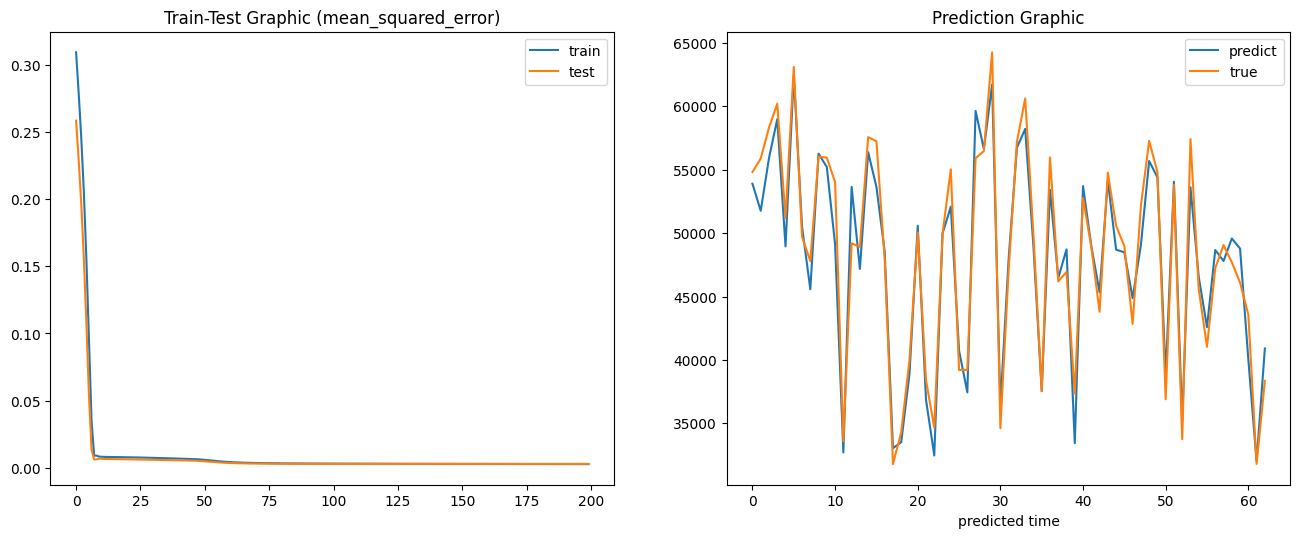

In [52]:
# Gráfico de validação:
pyplot.figure(dpi=100,figsize=(16,6))

pyplot.subplot(121)
pyplot.plot(history.history['loss'], label='train') # Treino
pyplot.plot(history.history['val_loss'], label='test') # Validação
pyplot.title(label='Train-Test Graphic (mean_squared_error)')
pyplot.legend()
#pyplot.savefig('/content/TrainTestGraphic(AttentionMechanism).pdf')

pyplot.subplot(122)
pyplot.plot(predicted_BTC_price, label='predict')
pyplot.plot(true_values, label='true')
pyplot.title(label='Prediction Graphic')
pyplot.xlabel('predicted time')
pyplot.legend()

#pyplot.savefig('/content/drive/MyDrive/TCC_MBA_PUC/01Case.pdf')

pyplot.show()

# AVALIAÇAO TENDÊNCIA ATIVO 
(INCLUSÃ0 ANÁLISE DE SENTIMENTO) - Considerando o caso base (2 LSTM 16 e 5 neurônios)

In [53]:
len(X),len(X[0])

(311, 5)

In [54]:
# vetorizar colunas do DF
close_values = Real_Price['Close']
vader = Real_Price['vader_comp(%)']

# Organização das janelas e composição do vetor de entrada da rede
window = 5        # A janela real é sempre o valor do (window - 1), pois é exclusivo!
trainSize = len(close_values)
X = []
y = []
# organizando os dados seguenciais em listas com o comprimento do window 
for i in range(window, trainSize):
    X.append(list(close_values.iloc[i-window:i]) + list(vader.iloc[i-window:i])) # + para concatenar as features, não é soma matricial
    y.append(close_values.iloc[i])

In [55]:
display(vader)

Date
2021-02-05     8.976145
2021-02-06    10.144201
2021-02-07     9.768178
2021-02-08    12.551693
2021-02-09    11.600320
                ...    
2021-12-13    18.654065
2021-12-14    18.654065
2021-12-15    18.654065
2021-12-16    18.654065
2021-12-17    16.599460
Name: vader_comp(%), Length: 316, dtype: float64

In [56]:
len(X),len(X[0])

(311, 10)

In [57]:
print(X)

[[38144.30859375, 39266.01171875, 38903.44140625, 46196.46484375, 46481.10546875, 8.976145218417956, 10.144200732153736, 9.768178217821754, 12.551692934301414, 11.600319540229917], [39266.01171875, 38903.44140625, 46196.46484375, 46481.10546875, 44918.18359375, 10.144200732153736, 9.768178217821754, 12.551692934301414, 11.600319540229917, 12.365887691435065], [38903.44140625, 46196.46484375, 46481.10546875, 44918.18359375, 47909.33203125, 9.768178217821754, 12.551692934301414, 11.600319540229917, 12.365887691435065, 18.654064650355952], [46196.46484375, 46481.10546875, 44918.18359375, 47909.33203125, 47504.8515625, 12.551692934301414, 11.600319540229917, 12.365887691435065, 18.654064650355952, 18.654064650355952], [46481.10546875, 44918.18359375, 47909.33203125, 47504.8515625, 47105.515625, 11.600319540229917, 12.365887691435065, 18.654064650355952, 18.654064650355952, 12.362389496717734], [44918.18359375, 47909.33203125, 47504.8515625, 47105.515625, 48717.2890625, 12.365887691435065, 

## LSTM - Valor com análise sentimento

In [58]:
trainX[0]

array([[0.22762164, 0.21780598, 0.20732911, 0.15599414, 0.1273513 ]])

Epoch 1/200
16/16 [==============================] - 3s 26ms/step - loss: 0.3173 - val_loss: 0.2701
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2967 - val_loss: 0.2479
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2697 - val_loss: 0.2198
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2377 - val_loss: 0.1876
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1978 - val_loss: 0.1457
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1448 - val_loss: 0.0939
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0814 - val_loss: 0.0415
Epoch 8/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0305 - val_loss: 0.0193
Epoch 9/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0189 - val_loss: 0.0166
Epoch 10/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0157 - val_loss: 0.0137
Epoch 11

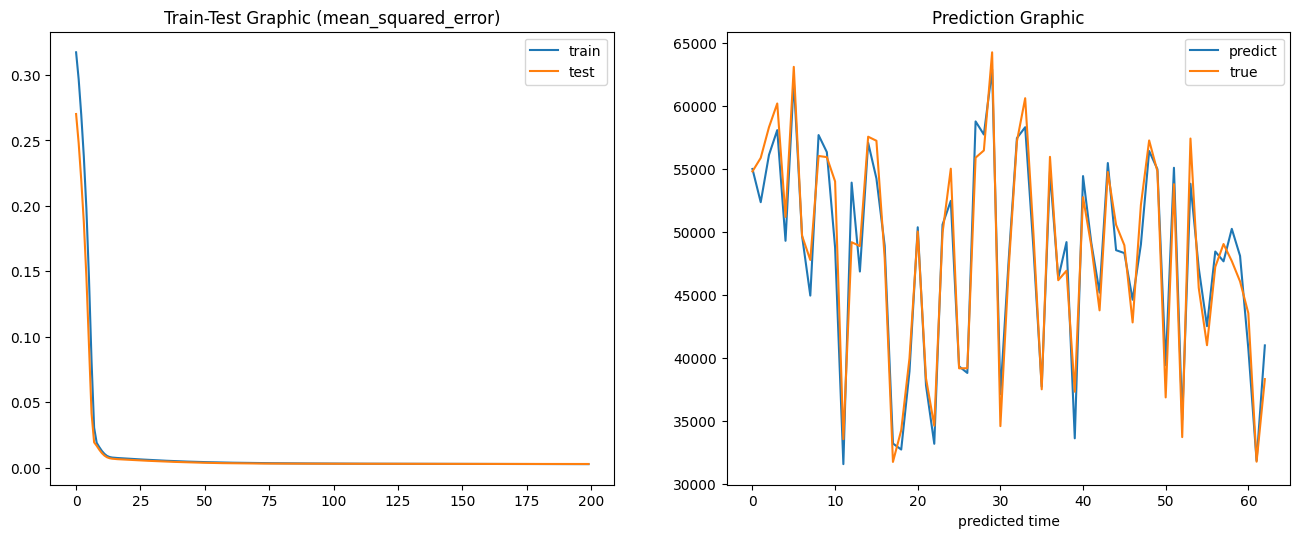

In [59]:
# divisão base em treino e test
df_train, df_test, trainY, testY = train_test_split(X, y, test_size = 0.2,random_state = random_seed)

# transformando dados traino e teste em matrizes
trainX = np.array(df_train)
testX = np.array(df_test)
trainY = np.array(trainY)
testY = np.array(testY)

# Normalização da base X de treino e teste
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaled_X_train = scaler_X.fit_transform(trainX)

scaled_X_test = scaler_X.transform(testX)

# Normalização da base y de treino e teste
scaler_y = MinMaxScaler(feature_range=(0, 1))
scaled_y_train = scaler_y.fit_transform(trainY.reshape(-1, 1))

scaled_y_test = scaler_y.transform(testY.reshape(-1, 1))

# Bases normalizadas:
trainX = np.reshape(scaled_X_train, (scaled_X_train.shape[0], 1, scaled_X_train.shape[1]))
testX = np.reshape(scaled_X_test, (scaled_X_test.shape[0], 1, scaled_X_test.shape[1]))

# Base predição normalizada
trainY = scaled_y_train
testY = scaled_y_test

# Montagem RNN
from keras.layers.core.activation import Activation

from keras.backend import dropout
regressor = Sequential()

#regressor.add(LSTM(units = 16, activation = 'softmax',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(LSTM(units = 16, activation = data_activation, return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(LSTM(units = 5, activation = data_activation))

regressor.add(Dense(units = 1))
regressor.compile(optimizer = data_optimizer, loss = 'mean_squared_error')
history = regressor.fit(trainX, trainY, batch_size = data_batch, epochs = data_epoch, verbose=1, shuffle=False, validation_data=(testX, testY))

# Carregamento melhores pesos da rede
# regressor.load_weights('best.h5')
# Making the predictions
predicted_BTC_price = regressor.predict(testX)
predicted_BTC_price = scaler_y.inverse_transform(predicted_BTC_price)
true_values = scaler_y.inverse_transform(testY)


# Gráfico de validação:
pyplot.figure(dpi=100,figsize=(16,6))

pyplot.subplot(121)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.title(label='Train-Test Graphic (mean_squared_error)')
pyplot.legend()
#pyplot.savefig('/content/TrainTestGraphic(AttentionMechanism).pdf')

pyplot.subplot(122)
pyplot.plot(predicted_BTC_price, label='predict')
pyplot.plot(true_values, label='true')
pyplot.title(label='Prediction Graphic')
pyplot.xlabel('predicted time')
pyplot.legend()

#pyplot.savefig('/content/drive/MyDrive/TCC_MBA_PUC/01Case.pdf')

pyplot.show()

In [60]:
# Métrica
rmse = sqrt(mean_squared_error(true_values, predicted_BTC_price))
print('Test RMSE: %.3f' % rmse)
regressor.summary()

Test RMSE: 1977.188
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 16)             1728      
                                                                 
 lstm_3 (LSTM)               (None, 5)                 440       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 2,174
Trainable params: 2,174
Non-trainable params: 0
_________________________________________________________________
